In [1]:
!pip install streamlit pyngrok --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.1 MB/s eta 0:00:00


In [2]:
!pkill -f streamlit

In [3]:
!pip install streamlit

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/MyDrive/data/area1_prices.csv')

df2 = pd.read_csv('/content/drive/MyDrive/data/area2_prices.csv')

df3 = pd.read_csv('/content/drive/MyDrive/data/area3_prices.csv')

df4 = pd.read_csv('/content/drive/MyDrive/data/area4_prices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df1.head()
df2.head()
df3.head()
df4.head()

,Item ID,Food Item,Category,Cafeteria Price (₹),Market Price (₹)
0,1,Veg Sandwich,Snacks,36,27
1,2,Paneer Grilled Sandwich,Snacks,60,46
2,3,Veg Maggie,Snacks,38,28
3,4,Aloo Cheese Paratha,Breakfast,50,37
4,5,Chicken Roll,Breakfast,65,50


In [6]:
# Function to add difference columns
def add_price_difference(df):
    df["Price Difference (₹)"] = df["Cafeteria Price (₹)"] - df["Market Price (₹)"]
    df["% Difference"] = ((df["Price Difference (₹)"] / df["Market Price (₹)"]) * 100).round(2)
    return df

# Apply to all dataframes
df1 = add_price_difference(df1)
df2 = add_price_difference(df2)
df3 = add_price_difference(df3)
df4 = add_price_difference(df4)

# Save back to Drive (optional)
df1.to_csv('/content/drive/MyDrive/data/area1_prices_updated.csv', index=False)
df2.to_csv('/content/drive/MyDrive/data/area2_prices_updated.csv', index=False)
df3.to_csv('/content/drive/MyDrive/data/area3_prices_updated.csv', index=False)
df4.to_csv('/content/drive/MyDrive/data/area4_prices_updated.csv', index=False)

print("All CSVs updated with Price Difference & % Difference and saved in Drive.")


All CSVs updated with Price Difference & % Difference and saved in Drive.


In [7]:


# Function to summarize each area
def summarize_area(df, area_name):
    avg_cafe = df["Cafeteria Price (₹)"].mean()
    avg_market = df["Market Price (₹)"].mean()
    avg_diff = df["% Difference"].mean()
    max_item = df.loc[df["% Difference"].idxmax()]["Food Item"]
    min_item = df.loc[df["% Difference"].idxmin()]["Food Item"]
    return {
        "Area": area_name,
        "Avg Cafeteria Price": round(avg_cafe, 2),
        "Avg Market Price": round(avg_market, 2),
        "Avg % Difference": round(avg_diff, 2),
        "Max Overpriced Item": max_item,
        "Min Overpriced Item": min_item
    }

# Summaries for all 4 areas
summary_list = []
summary_list.append(summarize_area(df1, "Area 1"))
summary_list.append(summarize_area(df2, "Area 2"))
summary_list.append(summarize_area(df3, "Area 3"))
summary_list.append(summarize_area(df4, "Area 4"))

summary_df = pd.DataFrame(summary_list)

# Compare across areas
highest_diff_area = summary_df.loc[summary_df["Avg % Difference"].idxmax()]["Area"]
closest_area = summary_df.loc[summary_df["Avg % Difference"].idxmin()]["Area"]

print(" Per-Area Summary Table:")
display(summary_df)

print("\nCombined Comparison Across Areas:")
print(f"- Highest average price difference: {highest_diff_area}")
print(f"- Closest to market rates: {closest_area}")


 Per-Area Summary Table:


,Area,Avg Cafeteria Price,Avg Market Price,Avg % Difference,Max Overpriced Item,Min Overpriced Item
0,Area 1,54.25,40.10,37.62,Aloo Paratha,Mineral Water (1L)
1,Area 2,56.90,42.35,36.83,Black Tea (250ml),Mineral Water (1L)
2,Area 3,60.30,44.70,36.81,Veg Momos (6 pcs),Bottled Water (1L)
3,Area 4,61.40,46.40,33.70,Kachori (1 pc),Bottled Water (1L)



Combined Comparison Across Areas:
- Highest average price difference: Area 1
- Closest to market rates: Area 4


In [8]:


# Dictionary to store summaries
area_summaries = {}

# Put dataframes in a dictionary
areas = {
    "Area 1": df1,
    "Area 2": df2,
    "Area 3": df3,
    "Area 4": df4
}

for name, df in areas.items():
    # Calculate averages
    avg_cafe = df["Cafeteria Price (₹)"].mean().round(2)
    avg_market = df["Market Price (₹)"].mean().round(2)
    avg_diff = df["% Difference"].mean().round(2)

    # Find max & min overpriced
    max_item = df.loc[df["% Difference"].idxmax(), ["Food Item", "% Difference"]]
    min_item = df.loc[df["% Difference"].idxmin(), ["Food Item", "% Difference"]]

    # Save summary
    area_summaries[name] = {
        "Avg Cafeteria Price": avg_cafe,
        "Avg Market Price": avg_market,
        "Avg % Difference": avg_diff,
        "Most Overpriced Item": f"{max_item['Food Item']} ({max_item['% Difference']}%)",
        "Least Overpriced Item": f"{min_item['Food Item']} ({min_item['% Difference']}%)"
    }

# Convert to summary table
summary_table = pd.DataFrame(area_summaries).T
print("📊 Per-Area Summary:")
display(summary_table)

# Compare across areas
comparison = pd.DataFrame({
    "Area": summary_table.index,
    "Avg % Difference": summary_table["Avg % Difference"]
}).sort_values(by="Avg % Difference", ascending=False)

print("\n🏆 Area Comparison (by Avg % Difference):")
display(comparison)


📊 Per-Area Summary:


,Avg Cafeteria Price,Avg Market Price,Avg % Difference,Most Overpriced Item,Least Overpriced Item
Area 1,54.25,40.1,37.62,Aloo Paratha (50.0%),Mineral Water (1L) (11.11%)
Area 2,56.9,42.35,36.83,Black Tea (250ml) (50.0%),Mineral Water (1L) (12.5%)
Area 3,60.3,44.7,36.81,Veg Momos (6 pcs) (54.76%),Bottled Water (1L) (17.65%)
Area 4,61.4,46.4,33.7,Kachori (1 pc) (42.86%),Bottled Water (1L) (17.65%)



🏆 Area Comparison (by Avg % Difference):


,Area,Avg % Difference
Area 1,Area 1,37.62
Area 2,Area 2,36.83
Area 3,Area 3,36.81
Area 4,Area 4,33.7


In [9]:
# Stats summary for each area: Mean, Median, Std Dev of % Difference
stats_summary = {}

for name, df in areas.items():
    stats_summary[name] = {
        "Mean % Diff": df["% Difference"].mean(),
        "Median % Diff": df["% Difference"].median(),
        "Std Dev % Diff": df["% Difference"].std()
    }

stats_table = pd.DataFrame(stats_summary).T
print(" Stats Summary (Per Area):")
display(stats_table)


 Stats Summary (Per Area):


,Mean % Diff,Median % Diff,Std Dev % Diff
Area 1,37.6160,39.445,9.817603
Area 2,36.8305,36.035,10.170307
Area 3,36.8055,35.620,8.607468
Area 4,33.6960,33.330,6.605430


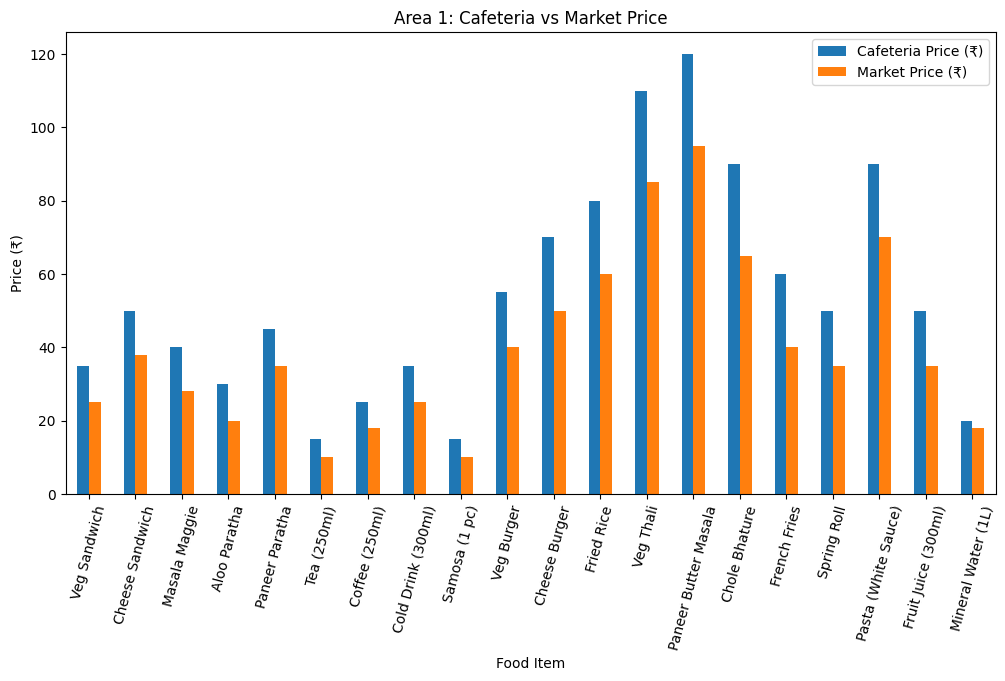

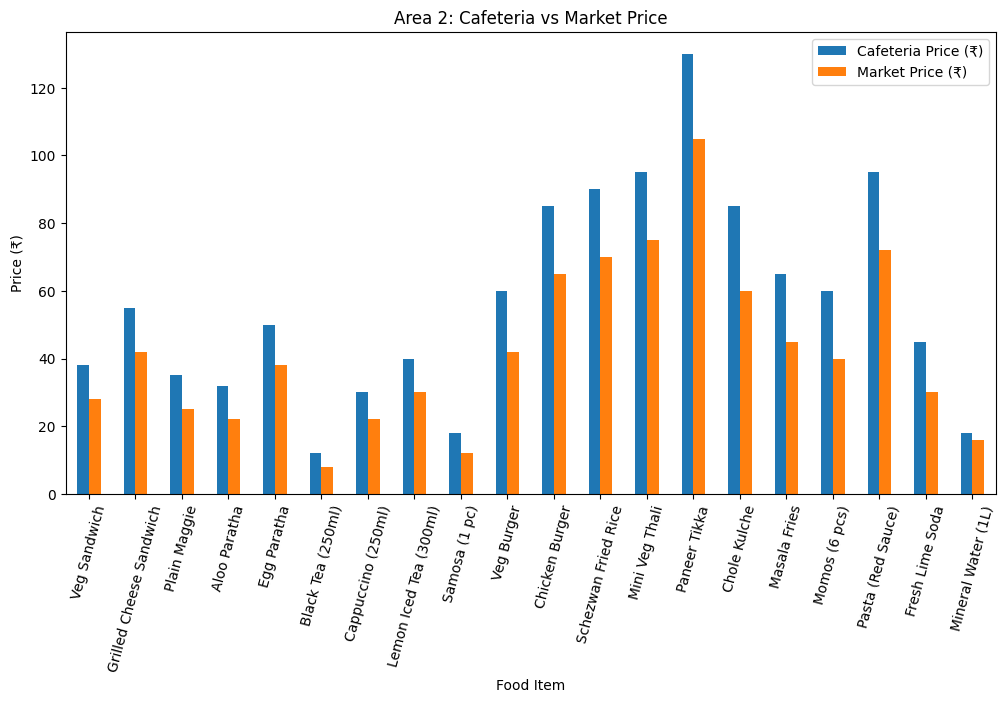

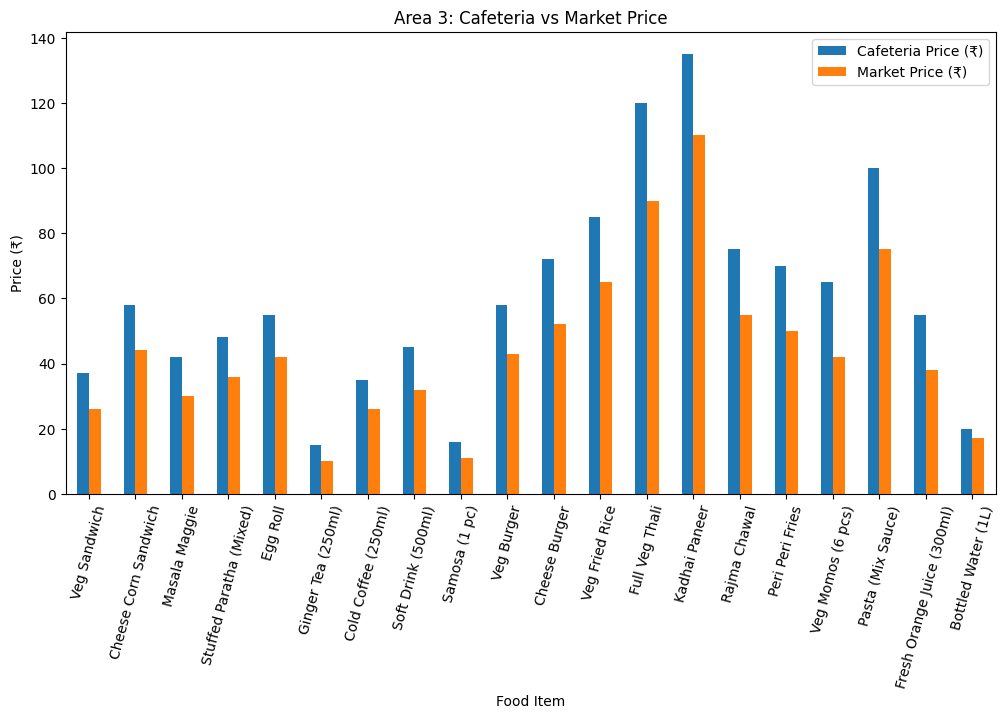

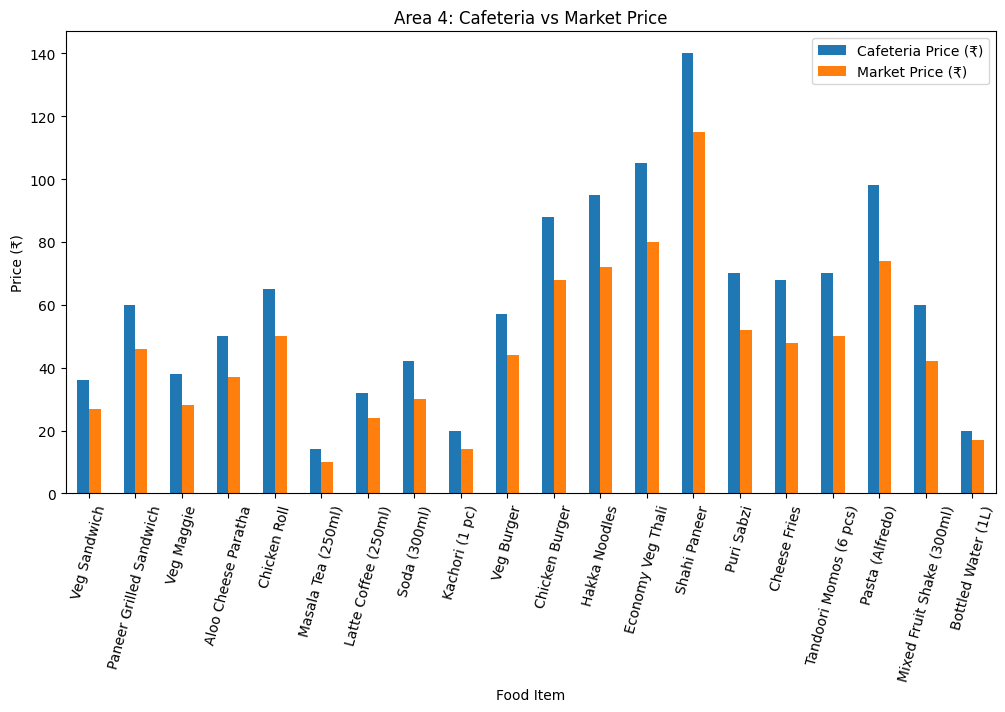

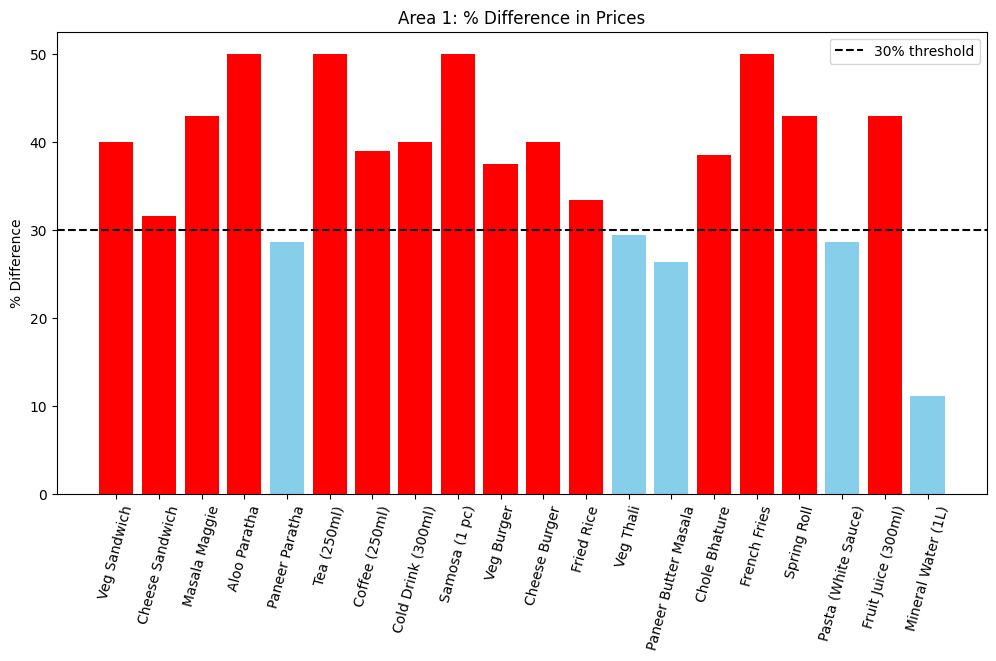

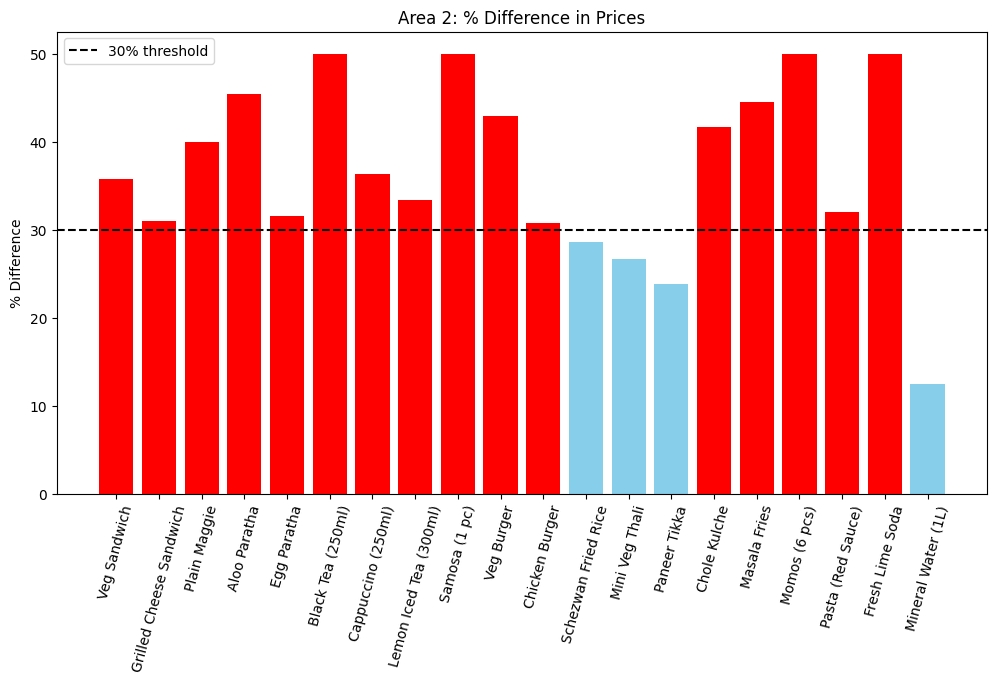

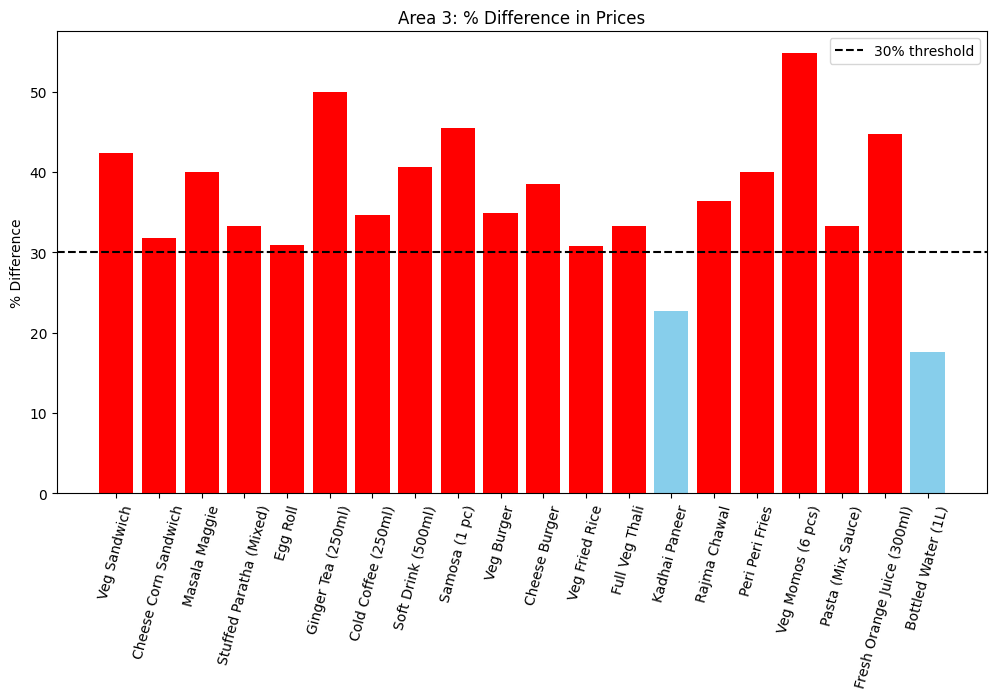

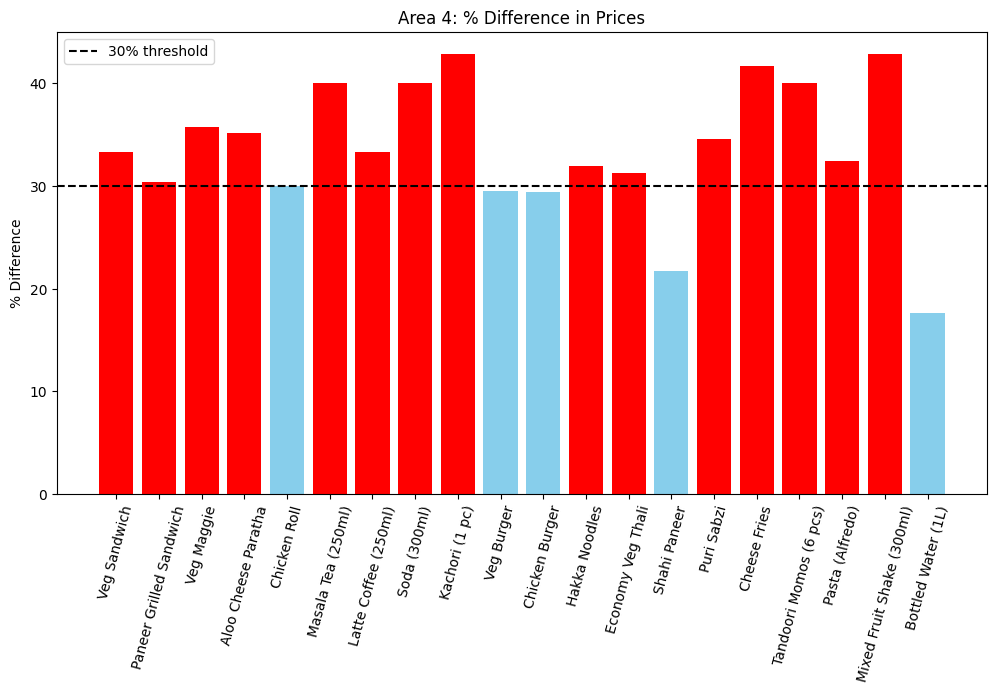

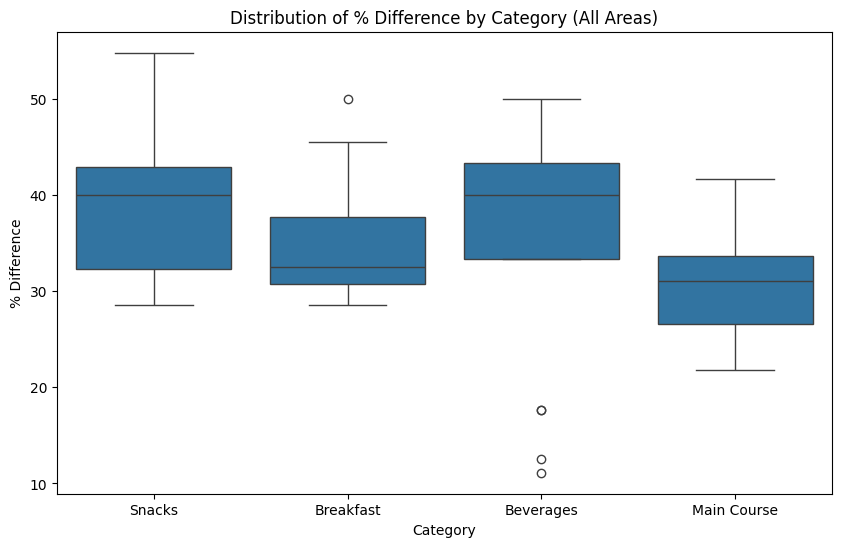

/tmp/ipython-input-389085692.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Area", y="% Difference", data=area_avg, palette="viridis")


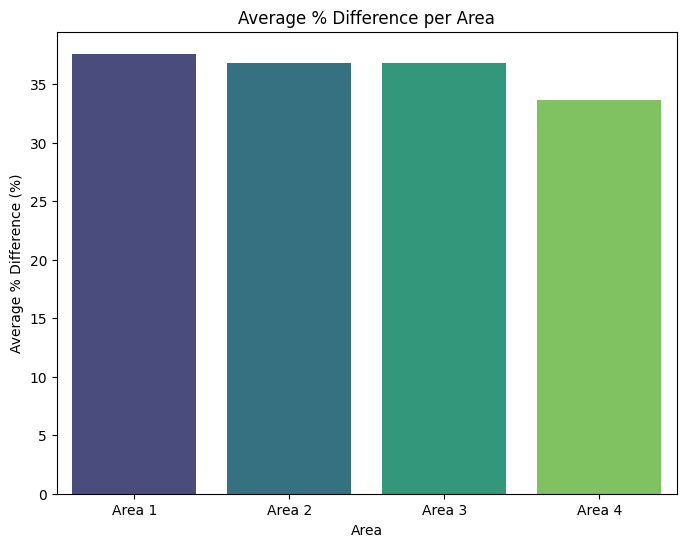

In [10]:


# --- 1. Bar Chart (Cafeteria vs Market Price per food item) ---
def plot_prices(df, area_name):
    df.plot(x="Food Item", y=["Cafeteria Price (₹)", "Market Price (₹)"], kind="bar", figsize=(12,6))
    plt.title(f"{area_name}: Cafeteria vs Market Price")
    plt.ylabel("Price (₹)")
    plt.xticks(rotation=75)
    plt.show()

for name, df in areas.items():
    plot_prices(df, name)


# --- 2. Bar Chart of % Difference (Highlight >30% overpriced) ---
# --- Fixed Bar Chart of % Difference (Highlight >30% overpriced) ---
def plot_percentage_diff(df, area_name):
    plt.figure(figsize=(12,6))
    colors = ["red" if x > 30 else "skyblue" for x in df["% Difference"]]
    plt.bar(df["Food Item"], df["% Difference"], color=colors)
    plt.axhline(30, color="black", linestyle="--", label="30% threshold")
    plt.title(f"{area_name}: % Difference in Prices")
    plt.xticks(rotation=75)
    plt.ylabel("% Difference")
    plt.legend()
    plt.show()

for name, df in areas.items():
    plot_percentage_diff(df, name)



# --- 3. Boxplot of % Difference by Category (all areas combined) ---
# First, add an Area column to each dataframe
df1["Area"], df2["Area"], df3["Area"], df4["Area"] = "Area 1", "Area 2", "Area 3", "Area 4"
combined = pd.concat([df1, df2, df3, df4], ignore_index=True)

plt.figure(figsize=(10,6))
sns.boxplot(x="Category", y="% Difference", data=combined)
plt.title("Distribution of % Difference by Category (All Areas)")
plt.show()


# --- 4. Comparison Chart (Average % Difference per Area) ---
area_avg = combined.groupby("Area")["% Difference"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x="Area", y="% Difference", data=area_avg, palette="viridis")
plt.title("Average % Difference per Area")
plt.ylabel("Average % Difference (%)")
plt.show()


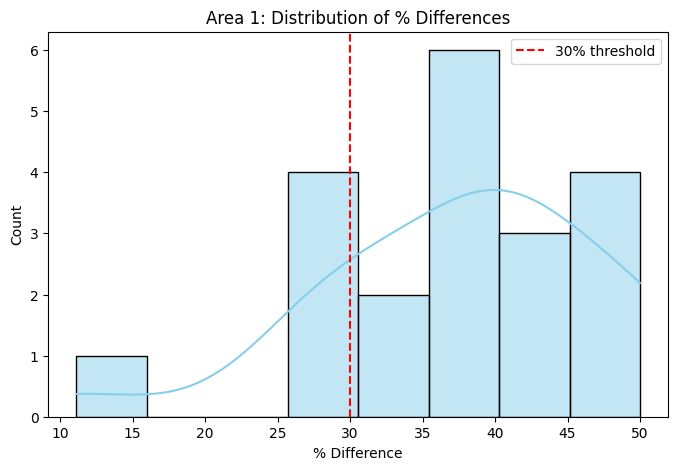

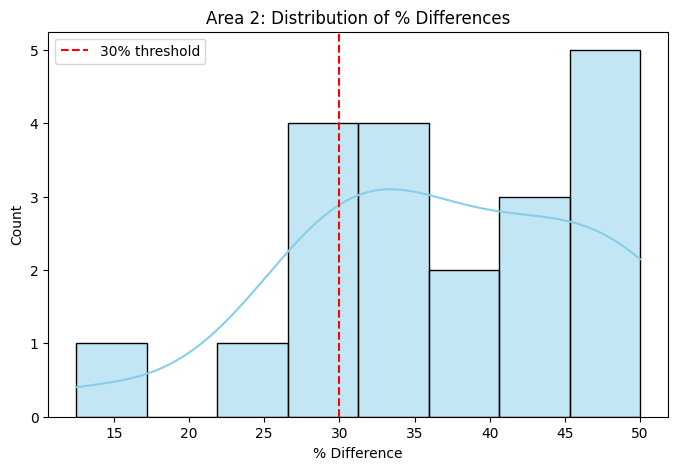

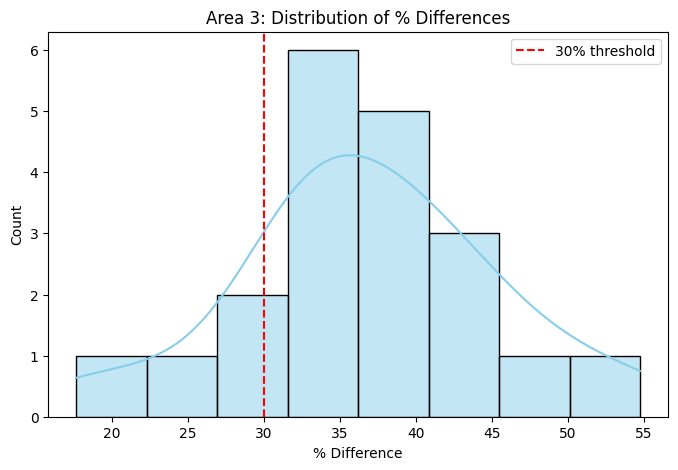

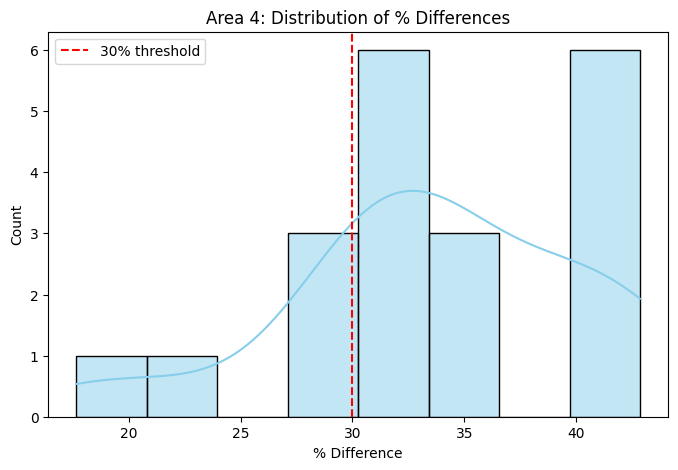

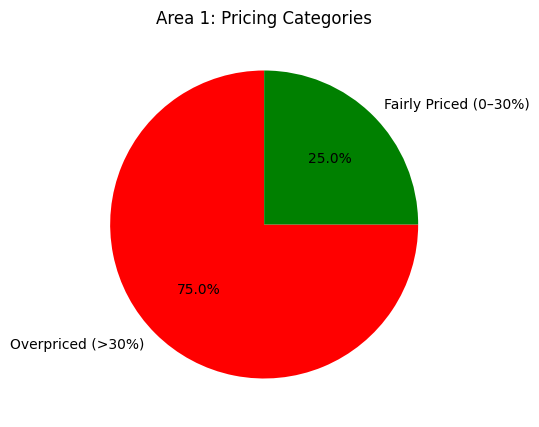

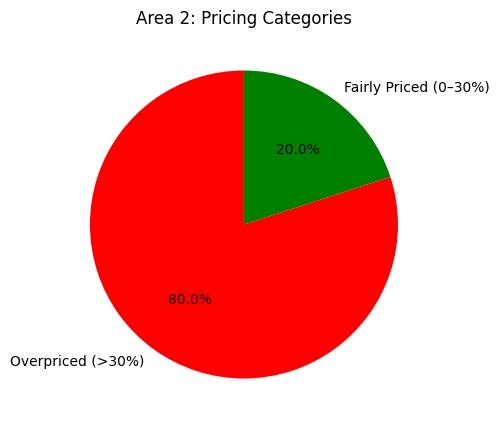

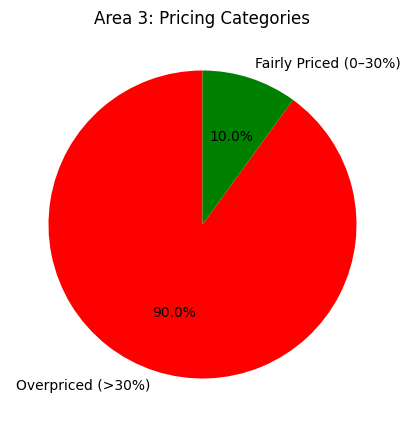

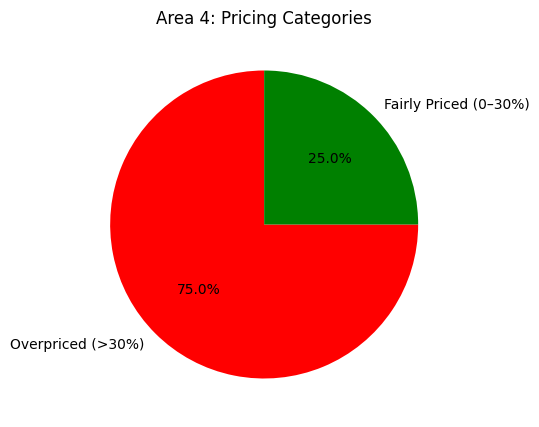

/tmp/ipython-input-3968846289.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Area", y="% Difference", data=combined, palette="Set2")


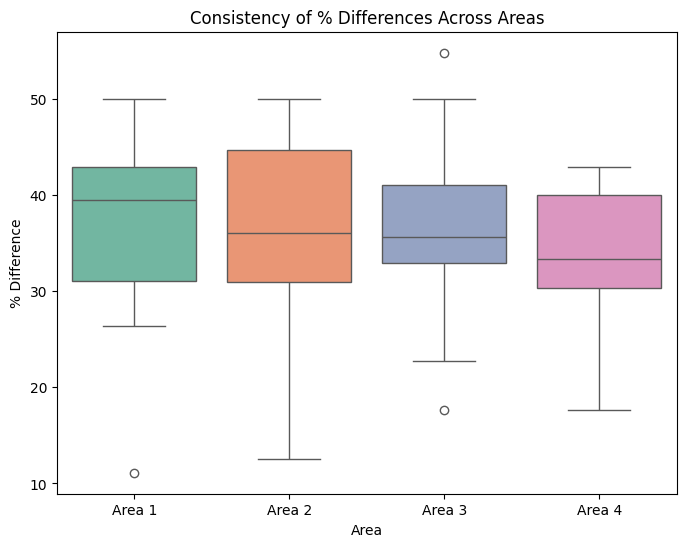

In [11]:
# --- 1. Distribution of % Differences (Histogram per area) ---
for name, df in areas.items():
    plt.figure(figsize=(8,5))
    sns.histplot(df["% Difference"], bins=8, kde=True, color="skyblue")
    plt.title(f"{name}: Distribution of % Differences")
    plt.xlabel("% Difference")
    plt.ylabel("Count")
    plt.axvline(30, color="red", linestyle="--", label="30% threshold")
    plt.legend()
    plt.show()


# --- 3. Counts & Proportions (Pie chart: Overpriced vs Fair vs Underpriced) ---
def categorize(x):
    if x > 30:
        return "Overpriced (>30%)"
    elif x < 0:
        return "Underpriced"
    else:
        return "Fairly Priced (0–30%)"

for name, df in areas.items():
    plt.figure(figsize=(5,5))
    df["Category_Label"] = df["% Difference"].apply(categorize)
    counts = df["Category_Label"].value_counts()
    counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=["red", "green", "orange"])
    plt.title(f"{name}: Pricing Categories")
    plt.ylabel("")
    plt.show()


# --- 4. Consistency Across Areas (Boxplot of % Difference per area) ---
plt.figure(figsize=(8,6))
sns.boxplot(x="Area", y="% Difference", data=combined, palette="Set2")
plt.title("Consistency of % Differences Across Areas")
plt.ylabel("% Difference")
plt.show()


In [12]:
!pip install streamlit
!pip install pyngrok

In [13]:
!pkill streamlit
!pkill ngrok


In [14]:
%%writefile app.py


# Load data (replace paths with your 4 CSV files in Drive)
areas = {
    "Area 1": pd.read_csv("/content/drive/MyDrive/data/area1_prices.csv"),
    "Area 2": pd.read_csv("/content/drive/MyDrive/data/area2_prices.csv"),
    "Area 3": pd.read_csv("/content/drive/MyDrive/data/area3_prices.csv"),
    "Area 4": pd.read_csv("/content/drive/MyDrive/data/area4_prices.csv"),
}

# Preprocessing function
def preprocess(df):
    df["Price Difference (₹)"] = df["Cafeteria Price (₹)"] - df["Market Price (₹)"]
    df["% Difference"] = ((df["Price Difference (₹)"] / df["Market Price (₹)"]) * 100).round()
    return df

areas = {name: preprocess(df) for name, df in areas.items()}

# Sidebar
st.sidebar.title("Cafeteria Price Analysis")
selected_area = st.sidebar.selectbox("Choose an Area", list(areas.keys()))

# Current dataset
df = areas[selected_area]

# Title
st.title("Cafeteria vs Market Price Analysis")
st.subheader(f"Data for {selected_area}")

# Show data
st.dataframe(df)

# Summary stats
st.subheader("Summary Statistics")
summary = df["% Difference"].agg(["mean", "median", "std"]).round(2)
st.write(summary)

# Bar chart: Cafeteria vs Market
st.subheader("Cafeteria vs Market Prices")
fig, ax = plt.subplots(figsize=(8,4))
df.plot(x="Food Item", y=["Cafeteria Price (₹)", "Market Price (₹)"], kind="bar", ax=ax)
plt.xticks(rotation=45, ha="right")
st.pyplot(fig)

# Bar chart: % Difference
st.subheader("Percentage Difference per Item")
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x="Food Item", y="% Difference", data=df, ax=ax, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
st.pyplot(fig)

# Insights
st.subheader("Quick Insights")
max_item = df.loc[df["% Difference"].idxmax()]
min_item = df.loc[df["% Difference"].idxmin()]
st.write(f"Most overpriced item: **{max_item['Food Item']} ({max_item['% Difference']}%)**")
st.write(f"Least overpriced item: **{min_item['Food Item']} ({min_item['% Difference']}%)**")


Writing app.py


In [15]:
!pip install streamlit pyngrok seaborn


In [16]:
!streamlit run app.py --server.port 8501 --server.headless true &>/dev/null&


In [17]:
from pyngrok import ngrok
ngrok.set_auth_token("32Rb3KAXJOAs5HK69JWWsxpyYHM_2rGUUzExinkEgr935Zp5Y")  # use the one from ngrok dashboard
public_url = ngrok.connect(8501)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://0d17ee0480f6.ngrok-free.app" -> "http://localhost:8501"


In [18]:
!ngrok config add-authtoken 32Rb3KAXJOAs5HK69JWWsxpyYHM_2rGUUzExinkEgr935Zp5Y


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
